In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Performing Analysis

In [28]:
df=pd.read_csv('train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [29]:
df.shape

(404290, 6)

In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [31]:
df.tail(10)

,id,qid1,qid2,question1,question2,is_duplicate
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404283,404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [32]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [34]:
#Checking null values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [35]:
#Checking duplicate rows
df.duplicated().sum()

0

In [36]:
#Duplicates and Non-duplicates distribution
print("Duplicates % is ",df[df['is_duplicate']==1].shape[0]/df['is_duplicate'].count()*100)
print("Non-Duplicates % is ",df[df['is_duplicate']==0].shape[0]/df['is_duplicate'].count()*100)

Duplicates % is  36.9197853026293
Non-Duplicates % is  63.08021469737069


In [42]:
#Repeated Questions

qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Count of Unique Questions',np.unique(qid).shape[0])
vc=qid.value_counts()>1
print('Count of Repeated Questions',vc[vc].shape[0])

Count of Unique Questions 537933
Count of Repeated Questions 111780


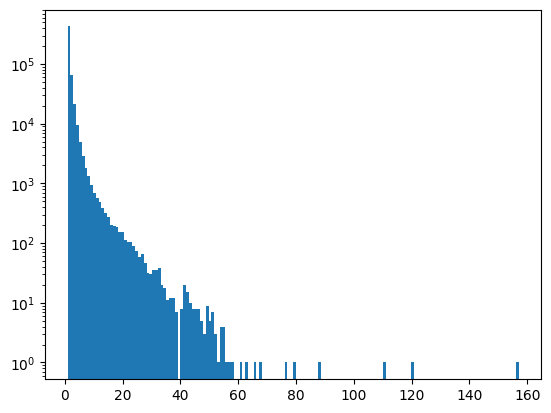

In [43]:
#Repeated Question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Base Accuracy using Random Forest

In [44]:
newDf=df.sample(30000)

In [45]:
newDf.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [47]:
quesdf=newDf[['question1','question2']]
quesdf.head()

,question1,question2
356164,What is a world view?,What is world view?
342683,How can I reduce 4 kgs in 7 days?,How can I reduce 3 kgs in 7 days?
211787,How can I score 90+ percentile in CAT 15 if I ...,What should be my preparation strategy if I st...
239084,Performance test engineer switching from Infos...,Which is the Popular Microeconomics Book for s...
1151,Working in IT as a support analyst for 2.5 yea...,I am an civil engineering graduate with 2 year...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(quesdf['question1']) + list(quesdf['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp_df1=pd.DataFrame(q1_arr,index=quesdf.index)
temp_df2=pd.DataFrame(q2_arr,index=quesdf.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [54]:
temp_df['is_duplicate']=newDf['is_duplicate']
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
356164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
342683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=10)

In [56]:
#Checking base accuracy using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7378333333333333

In [57]:
#Checking base accuracy using XGBoost
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.722